In [78]:
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)

X_trn=train_data.iloc[:,1:]
y_trn=train_data['TARGET']
X_tes=test_data.iloc[:,1:]
y_tes=test_data['TARGET']

In [3]:
data.head()

,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
1,0,2,3,4,1,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,2,3,1,1,1,1,3,3,...,1,3,3,1,1,1,3,3,3,3
3,0,2,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,3,3,4,1,4,4,4,1,1,...,3,3,3,1,3,3,1,1,1,1
5,0,3,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   TARGET                        119535 non-null  int64
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  int64
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  int64
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  int64
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  int64
 5   J_TOT_LON_CNT_RE              119535 non-null  int64
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  int64
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  int64
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  int64
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  int64
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  int64
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  int64
 12  J_CORE_DPS_6M_AVBL_AM_RE      119535 non-null  int64
 13  J_TOT_DPS_ACC_

In [6]:
data['TARGET'].value_counts()

0    118720
1       815
Name: TARGET, dtype: int64

In [9]:
data['TARGET'].value_counts(normalize = True)

0    0.993182
1    0.006818
Name: TARGET, dtype: float64

<AxesSubplot:>

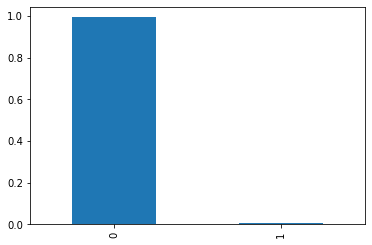

In [7]:
data['TARGET'].value_counts(normalize=True).plot(kind='bar')

In [13]:
print(X_trn.shape)
print(X_tes.shape)

(95628, 92)
(23907, 92)


### Oversampling Using SMOTE NC

In [80]:
from imblearn.over_sampling import SMOTENC
smotenc=SMOTENC(categorical_features=[42,43,44,63,64,65,66,67],random_state=1000)
X_trn_over, y_trn_over = smotenc.fit_resample(X_trn,y_trn)

In [81]:
X_trn_over.shape

(189938, 92)

In [82]:
y_trn_over.value_counts()

0    94969
1    94969
Name: TARGET, dtype: int64

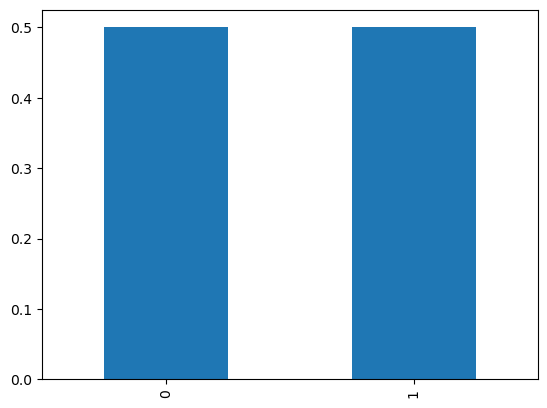

In [84]:
y_trn_over.value_counts(normalize=True).plot(kind='bar')
plt.show()

### Dummy coding for the nominal dataset

In [85]:
nominal_col=X_trn_over.columns[[42,43,44,63,64,65,66,67]]
X_trn_over_dummy = pd.get_dummies(X_trn_over,columns=nominal_col)
X_tes_dummy=pd.get_dummies(X_tes,columns=nominal_col)

In [21]:
print(X_trn_over.shape[1])
print(X_trn_over_dummy.shape[1])

92
100


In [22]:
print(X_tes.shape[1])
print(X_tes_dummy.shape[1])

92
100


In [86]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))

In [87]:
X_trn_over_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189938 entries, 0 to 189937
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   J_F1_LON_RK_3M_CNT_RE         189938 non-null  int64
 1   J_F1_OTHER_LON_6M_AVBL_AM_RE  189938 non-null  int64
 2   J_F1_OTHER_LON_MAX_3M_AM_RE   189938 non-null  int64
 3   J_SHINBO_GIBO_AM_RE           189938 non-null  int64
 4   J_TOT_LON_CNT_RE              189938 non-null  int64
 5   J_TOT_LON_AGG_AM_RE           189938 non-null  int64
 6   J_TOT_LON_MAX_AM_RE           189938 non-null  int64
 7   J_DPS_CT_BAL_AM_RE            189938 non-null  int64
 8   J_TOT_DPS_1M_AVBL_AM_RE       189938 non-null  int64
 9   J_TOT_DPS_6M_AVBL_AM_RE       189938 non-null  int64
 10  J_CORE_DPS_1M_AVBL_AM_RE      189938 non-null  int64
 11  J_CORE_DPS_6M_AVBL_AM_RE      189938 non-null  int64
 12  J_TOT_DPS_ACC_CNT_RE          189938 non-null  int64
 13  J_NRML_DPS_AC

### Logistic Regression 

In [88]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='liblinear',max_iter = 1000)
clf.fit(X_trn_over_dummy,y_trn_over)
pred=clf.predict(X_tes_dummy)
get_eval(y_tes,pred)

confusion matrix
[[20060  3691]
 [   31   125]]
accuracy : 0.8443 , precision : 0.0328 , recall : 0.8013, F1 score : 0.0629 
 precision(0) : 0.9985 , recall(0) : 0.8446, f1(0) : 0.9151


### Naive Bayes

In [89]:
from sklearn.naive_bayes import CategoricalNB
catNB=CategoricalNB(fit_prior=False)
catNB.fit(X_trn_over_dummy,y_trn_over)
pred2=catNB.predict(X_tes_dummy)
get_eval(y_tes,pred2)

confusion matrix
[[17936  5815]
 [   52   104]]
accuracy : 0.7546 , precision : 0.0176 , recall : 0.6667, F1 score : 0.0342 
 precision(0) : 0.9971 , recall(0) : 0.7552, f1(0) : 0.8594


### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree=DecisionTreeClassifier(random_state=1000)
tree.fit(X_trn_dummy,y_trn)
pred3=tree.predict(X_tes_dummy)
get_eval(y_tes,pred3)

confusion matrix
[[23668    83]
 [   60    96]]
accuracy : 0.9940 , precision : 0.5363 , recall : 0.6154, F1 score : 0.5731 
 precision(0) : 0.9975 , recall(0) : 0.9965, f1(0) : 0.9970


### Grid Search

In [69]:
dt=DecisionTreeClassifier(random_state=1000)
parm_dict={"criterion":['gini','entropy'],'max_depth':[15,16,17,18,19,20,21,22,23],'min_samples_split':range(0,5)}
grid=GridSearchCV(dt,param_grid=parm_dict,cv=10,n_jobs=-1)
grid.fit(X_trn_dummy,y_trn)
grid.best_params_

C:\Users\vmffl\python\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.99305642 0.99307735 0.99295186        nan
        nan 0.99319237 0.99327603 0.99303552        nan        nan
 0.99324466 0.99333878 0.99282637        nan        nan 0.99298323
 0.99312963 0.99295186        nan        nan 0.9930878  0.99311917
 0.99275316        nan        nan 0.99327602 0.99320284 0.99294139
        nan        nan 0.99322374 0.99317146 0.9929414         nan
        nan 0.99327603 0.99309826 0.99287865        nan        nan
 0.9933074  0.99315054 0.99283682        nan        nan 0.99380934
 0.99366295 0.99370477        nan        nan 0.9936734  0.99386164
 0.99370477        nan        nan 0.99353746 0.99362111 0.99369431
        nan        nan 0.9936734  0.99372569 0.9937257         nan
        nan 0.99381981 0.99375706 0.99381981        nan        nan
 0.99375706 0.99376752 0.99378843        nan        nan 

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 3}

In [70]:
pred3=grid.best_estimator_.predict(X_tes_dummy)
get_eval(y_tes,pred3)

confusion matrix
[[23677    74]
 [   70    86]]
accuracy : 0.9940 , precision : 0.5375 , recall : 0.5513, F1 score : 0.5443 
 precision(0) : 0.9971 , recall(0) : 0.9969, f1(0) : 0.9970


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf=RandomForestClassifier(random_state=1000)
rdf_clf.fit(X_trn_over_dummy,y_trn_over)
pred4=rdf_clf.predict(X_tes_dummy)
get_eval(y_tes,pred4)

confusion matrix
[[23727    24]
 [   57    99]]
accuracy : 0.9966 , precision : 0.8049 , recall : 0.6346, F1 score : 0.7097 
 precision(0) : 0.9976 , recall(0) : 0.9990, f1(0) : 0.9983


### KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_trn_over_dummy,y_trn_over)
pred5=knn_clf.predict(X_tes_dummy)
get_eval(y_tes,pred5)

confusion matrix
[[23634   117]
 [   35   121]]
accuracy : 0.9936 , precision : 0.5084 , recall : 0.7756, F1 score : 0.6142 
 precision(0) : 0.9985 , recall(0) : 0.9951, f1(0) : 0.9968


In [18]:
X_trn_dummy= pd.get_dummies(X_trn,columns=nominal_col)

### XG Boost

In [19]:
import xgboost as xgb
from xgboost import plot_importance

dtrain=xgb.DMatrix(data=X_trn_dummy.values, label=y_trn)
dtest=xgb.DMatrix(data=X_tes_dummy.values, label = y_tes)

In [101]:
params={'max_depth':8,'eta':0.1,'objective':'binary:logistic','eval_metric':'logloss','early_stopping':100}
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=600,early_stopping_rounds=100,evals=wlist)

[23:52:30] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60052	eval-logloss:0.60045
[1]	train-logloss:0.52437	eval-logloss:0.52459
[2]	train-logloss:0.46101	eval-logloss:0.46130
[3]	train-logloss:0.40748	eval-logloss:0.40786
[4]	train-logloss:0.36169	eval-logloss:0.36223
[5]	train-logloss:0.32241	eval-logloss:0.32294
[6]	train-logloss:0.28822	eval-logloss:0.28893
[7]	train-logloss:0.25855	eval-logloss:0.25926
[8]	train-logloss:0.23255	eval-logloss:0.23334
[9]	train-logloss:0.20974	eval-logloss:0.21057
[10]	train-logloss:0.18949	eval-logloss:0.19043
[11]	train-logloss:0.17166	eval-logloss:0.17266
[12]	train-logloss:0.15577	eval-logloss:0.15683
[13]	train-logloss:0.14173	eval-logloss:0.14287
[14]

[163]	train-logloss:0.00434	eval-logloss:0.01157
[164]	train-logloss:0.00428	eval-logloss:0.01153
[165]	train-logloss:0.00425	eval-logloss:0.01150
[166]	train-logloss:0.00420	eval-logloss:0.01145
[167]	train-logloss:0.00417	eval-logloss:0.01143
[168]	train-logloss:0.00411	eval-logloss:0.01139
[169]	train-logloss:0.00409	eval-logloss:0.01137
[170]	train-logloss:0.00407	eval-logloss:0.01135
[171]	train-logloss:0.00405	eval-logloss:0.01133
[172]	train-logloss:0.00402	eval-logloss:0.01133
[173]	train-logloss:0.00399	eval-logloss:0.01133
[174]	train-logloss:0.00398	eval-logloss:0.01132
[175]	train-logloss:0.00394	eval-logloss:0.01130
[176]	train-logloss:0.00392	eval-logloss:0.01128
[177]	train-logloss:0.00389	eval-logloss:0.01125
[178]	train-logloss:0.00386	eval-logloss:0.01122
[179]	train-logloss:0.00383	eval-logloss:0.01123
[180]	train-logloss:0.00380	eval-logloss:0.01122
[181]	train-logloss:0.00378	eval-logloss:0.01121
[182]	train-logloss:0.00375	eval-logloss:0.01119
[183]	train-logloss:

[331]	train-logloss:0.00173	eval-logloss:0.01013
[332]	train-logloss:0.00173	eval-logloss:0.01014
[333]	train-logloss:0.00172	eval-logloss:0.01013
[334]	train-logloss:0.00172	eval-logloss:0.01014
[335]	train-logloss:0.00172	eval-logloss:0.01014
[336]	train-logloss:0.00171	eval-logloss:0.01014
[337]	train-logloss:0.00171	eval-logloss:0.01013
[338]	train-logloss:0.00170	eval-logloss:0.01014
[339]	train-logloss:0.00169	eval-logloss:0.01015
[340]	train-logloss:0.00169	eval-logloss:0.01014
[341]	train-logloss:0.00169	eval-logloss:0.01014
[342]	train-logloss:0.00168	eval-logloss:0.01015
[343]	train-logloss:0.00168	eval-logloss:0.01014
[344]	train-logloss:0.00167	eval-logloss:0.01015
[345]	train-logloss:0.00167	eval-logloss:0.01015
[346]	train-logloss:0.00166	eval-logloss:0.01015
[347]	train-logloss:0.00166	eval-logloss:0.01015
[348]	train-logloss:0.00165	eval-logloss:0.01015
[349]	train-logloss:0.00165	eval-logloss:0.01014
[350]	train-logloss:0.00165	eval-logloss:0.01015
[351]	train-logloss:

In [102]:
pred_probs=xgb_model.predict(dtest)
pred6=[1 if x>0.5 else 0 for x in pred_probs]
get_eval(y_tes,pred6)

confusion matrix
[[23737    14]
 [   56   100]]
accuracy : 0.9971 , precision : 0.8772 , recall : 0.6410, F1 score : 0.7407 
 precision(0) : 0.9976 , recall(0) : 0.9994, f1(0) : 0.9985


### Model Comparison

In [28]:
def get_eval_list(y_test,pred_value):
    pred_list=[]
    pred_list.append(np.round(accuracy_score(y_test,pred_value),4))
    pred_list.append(np.round(precision_score(y_test,pred_value),4))
    pred_list.append(np.round(recall_score(y_test,pred_value),4))
    pred_list.append(np.round(f1_score(y_test,pred_value),4))
    return pred_list

In [93]:
logistic=get_eval_list(y_tes,pred)
nb=get_eval_list(y_tes,pred2)
knn=get_eval_list(y_tes,pred5)
rf=get_eval_list(y_tes,pred4)
xg=get_eval_list(y_tes,pred6)
tree=get_eval_list(y_tes,pred3)
print(logistic,'\n',nb,'\n',knn,'\n',rf,'\n',xg,'\n',tree)

[0.8443, 0.0328, 0.8013, 0.0629] 
 [0.7546, 0.0176, 0.6667, 0.0342] 
 [0.9936, 0.5084, 0.7756, 0.6142] 
 [0.9966, 0.8049, 0.6346, 0.7097] 
 [0.9969, 0.8868, 0.6026, 0.7176] 
 [0.994, 0.5363, 0.6154, 0.5731]


In [94]:
eval_matrix=pd.DataFrame(columns=['Logistic','NB','KNN','DT','RF','XG'],index=['Accuracy','Precision(1)','Recall(1)','F1_Score(1)'])
eval_matrix['Logistic']=logistic
eval_matrix['NB']=nb
eval_matrix['KNN']=knn
eval_matrix['RF']=rf
eval_matrix['XG']=xg
eval_matrix['DT']=tree
eval_matrix

,Logistic,NB,KNN,DT,RF,XG
Accuracy,0.8443,0.7546,0.9936,0.9940,0.9966,0.9969
Precision(1),0.0328,0.0176,0.5084,0.5363,0.8049,0.8868
Recall(1),0.8013,0.6667,0.7756,0.6154,0.6346,0.6026
F1_Score(1),0.0629,0.0342,0.6142,0.5731,0.7097,0.7176


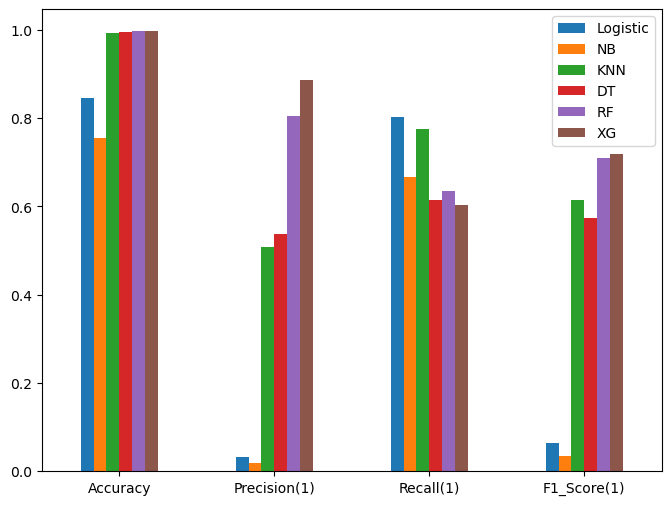

In [95]:
eval_matrix.plot(kind='bar',figsize=(8,6),rot=0)
plt.show()

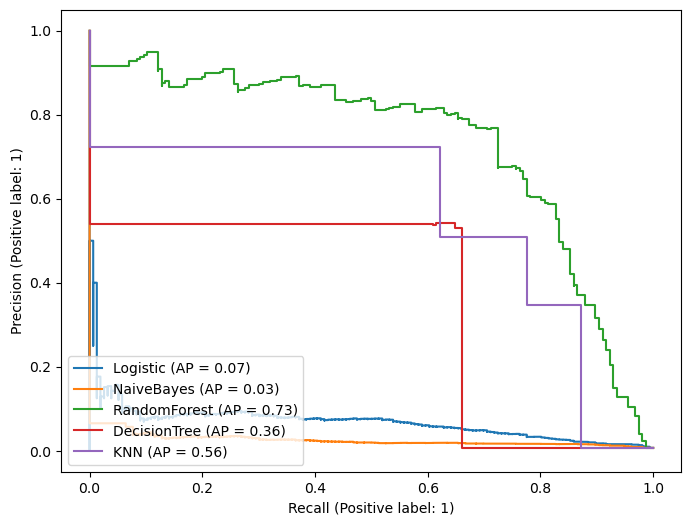

In [100]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_precision_recall_curve(clf, X_tes_dummy, y_tes, ax = plt.gca(), name = "Logistic")
plot_precision_recall_curve(catNB, X_tes_dummy, y_tes,ax = plt.gca(),name = "NaiveBayes")
plot_precision_recall_curve(rdf_clf, X_tes_dummy, y_tes,ax = plt.gca(),name = "RandomForest")
plot_precision_recall_curve(tree, X_tes_dummy, y_tes,ax = plt.gca(),name = "DecisionTree")
plot_precision_recall_curve(knn_clf, X_tes_dummy, y_tes,ax = plt.gca(),name = "KNN")
plt.show()